In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_colors(image_path, num_colors):
    # Load image
    image = mp_image.imread(image_path)
    print("image:", image)
    image = image / 255.0  # normalize to [0,1]
    print(image.shape)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    print(pixels.shape)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors
    colors = model.cluster_centers_
    
    # Display the colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(colors):
        print(i,color)
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    
    return colors

# Use the function
colors = extract_colors('C:\\Users\\user\\amazon\\Detection\\team5\\Color_extraction\\test_images\\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg', num_colors=5)


: 

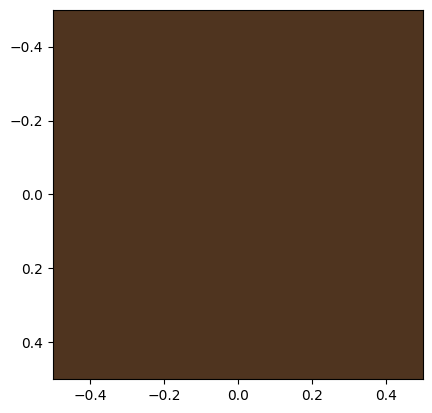

(79, 52, 31)
[(96, 68, 46), (220, 214, 207), (177, 166, 151), (161, 152, 149)]


In [13]:
# color_thief
from colorthief import ColorThief
import matplotlib.pyplot as plt
import colorsys

color_thief = ColorThief('C:\\Users\\user\\amazon\\Detection\\team5\\Color_extraction\\test_images\\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg')
dominant_color = color_thief.get_color(quality=10)
palette = color_thief.get_palette(color_count=3)
plt.imshow([[dominant_color]])
plt.show()
print(dominant_color)
print(palette)

Original image mode: RGB
Tensor shape: torch.Size([3, 1500, 1500])
First few values of the tensor: tensor([0.9647, 0.9725, 0.9686])
Pixels shape: (2250000, 3)
First pixel values: [0.9647059 0.9647059 0.9647059]


c:\Users\user\anaconda3\envs\ktteam5\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Color 0: [0.0972389  0.09633747 0.0968948 ]
Color 1: [0.65076077 0.65039766 0.65039444]
Color 2: [0.27102792 0.2711572  0.27124697]
Color 3: [0.4644897  0.4646308  0.46451783]
Color 4: [0.9070009  0.90769696 0.90673095]


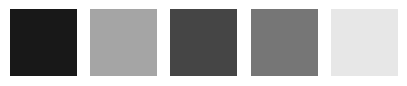

In [17]:
# torch
import torch
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

def extract_colors(image_path, num_colors):
    # Load image
    image = Image.open(image_path)
    print(f"Original image mode: {image.mode}")  # Print the image mode (should be RGB for color images)
    image.show()

    # Ensure image is in RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Apply the ToTensor transform
    transform = transforms.ToTensor()
    tensor = transform(image)  # Transform to torch tensor
    print('Tensor shape:', tensor.shape)
    print('First few values of the tensor:', tensor[:, 0, 0])  # Print first few values in the tensor
    
    # Reshape the image to be a list of pixels
    pixels = tensor.view(-1, 3).numpy()
    print('Pixels shape:', pixels.shape)
    print('First pixel values:', pixels[0])
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors
    colors = model.cluster_centers_
    
    # Display the colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(colors):
        print(f"Color {i}: {color}")
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    return colors

# Use the function
colors = extract_colors('C:\\Users\\user\\amazon\\Detection\\team5\\Color_extraction\\test_images\\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg', num_colors=5)
